In [1]:
from __future__ import annotations
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Any, cast
from scipy.signal import savgol_filter

In [2]:
os.chdir("../")

In [3]:
def smooth_window(win, spivot: float, window_length: int = 10, polyorder: int = 3, kind="interp"):
    s = win[0]
    idx = np.searchsorted(s, spivot, side="right")
    swin = win.copy()
    for i in [3, 5, 7, 9]:
        if kind == "interp":
            to_smooth = win[i, :idx][::-1]
            swin[i, :idx] = savgol_filter(to_smooth, window_length, polyorder)[::-1]
    return swin

In [4]:
def compare_window(complete_path, data_path, title: str = "", smoothing: bool = False):
    complete = np.loadtxt(complete_path).T
    idx = np.searchsorted(complete[0], 100)
    for path, fmt, suffix in zip([data_path, complete_path], ["-", "--"], ["", " noric"]):
        win = np.loadtxt(path).T
        norm = win[3, idx]
        win[3:, :] /= norm
        if smoothing:
            win = smooth_window(win, 20, 15)
        s = win[0]
        plt.semilogx(s, win[3], fmt, label=Rf"$Q_0${suffix}")
        plt.semilogx(s, win[5], fmt, label=Rf"$Q_2${suffix}")
        plt.semilogx(s, win[7], fmt, label=Rf"$Q_4${suffix}")
        plt.semilogx(s, win[9], fmt, label=Rf"$Q_6${suffix}")
    plt.axvline(100, c="c", lw=1)
    plt.legend(frameon=False)
    plt.title(title)
    plt.xlim(3, 3500)
    plt.show()

In [5]:
ROOT = Path("cobaya/data/gbwindow")

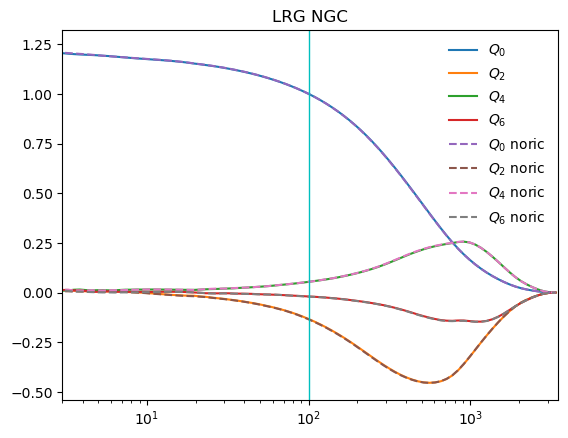

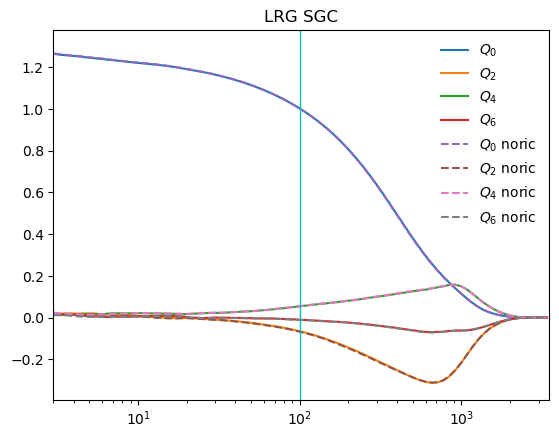

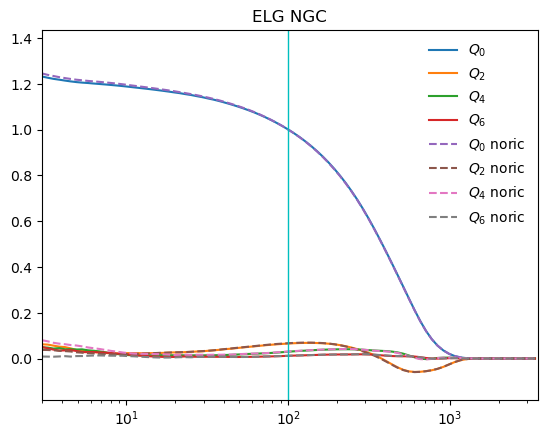

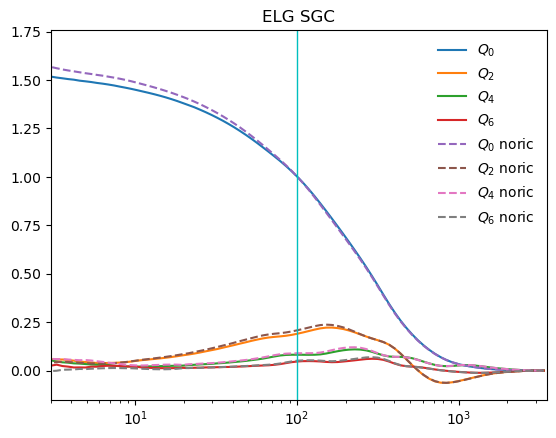

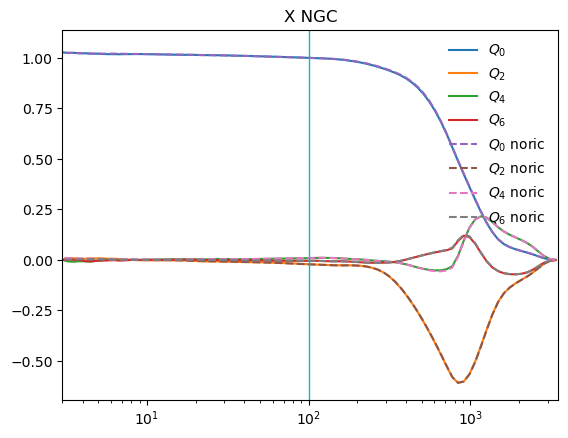

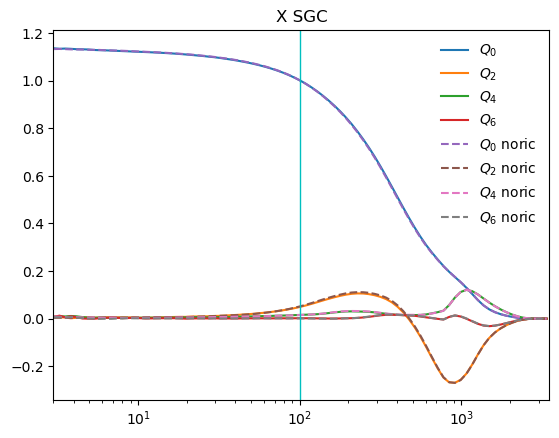

In [6]:
compare_window(ROOT / "LRG_NGC_QQ.dat", ROOT / "LRG_NGC_complete_QQ.dat", "LRG NGC", True)
compare_window(ROOT / "LRG_SGC_QQ.dat", ROOT / "LRG_SGC_complete_QQ.dat", "LRG SGC", True)
compare_window(ROOT / "ELG_NGC_QQ.dat", ROOT / "ELG_NGC_complete_QQ.dat", "ELG NGC", True)
compare_window(ROOT / "ELG_SGC_QQ.dat", ROOT / "ELG_SGC_complete_QQ.dat", "ELG SGC", True)
compare_window(ROOT / "X_NGC_QQ.dat", ROOT / "X_NGC_complete_QQ.dat", "X NGC", True)
compare_window(ROOT / "X_SGC_QQ.dat", ROOT / "X_SGC_complete_QQ.dat", "X SGC", True)

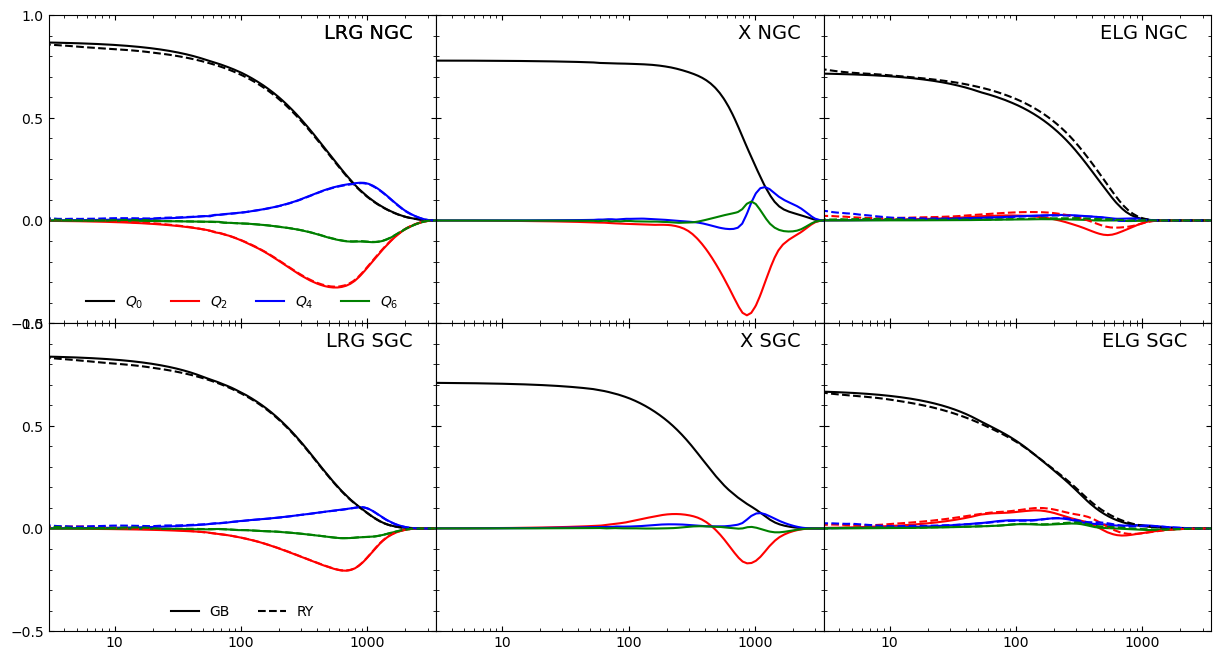

In [106]:
do_smoothing = True
fig, axes = plt.subplots(
    2, 3, sharex=True, sharey=True, figsize=(15, 8),
    gridspec_kw={"hspace": 0, "wspace": 0})
axes = cast(Any, axes)

# LRG NGC
win = np.loadtxt("cobaya/data/window/LRG_NGC_GB_interp.dat").T
s = win[0]
ax = axes[0, 0]
ax.semilogx(s, win[1], "k-", label=R"$Q_0$")
ax.semilogx(s, win[2], "r-", label=R"$Q_2$")
ax.semilogx(s, win[3], "b-", label=R"$Q_4$")
ax.semilogx(s, win[4], "g-", label=R"$Q_6$")
ax.legend(frameon=False, loc="lower center", ncol=4)

win = np.loadtxt(ROOT / "LRG_NGC_QQ.dat").T
if do_smoothing:
    win = smooth_window(win, 20, 15)
norm = 1 / (8 * np.pi * 6.178544514228104) * 0.02043472833528684**2
s = win[0]
ax.semilogx(s, win[3] * norm, "k--")
ax.semilogx(s, win[5] * norm, "r--")
ax.semilogx(s, win[7] * norm, "b--")
ax.semilogx(s, win[9] * norm, "g--")
ax.text(0.94, 0.94, "LRG NGC", fontdict={"fontsize": 14}, transform=ax.transAxes, ha="right", va="center")

# win = np.loadtxt(ROOT / "LRG_NGC_complete_QQ.dat").T
# norm = 1 / (8 * np.pi * 6.196691) * 0.0500169**2
# s = win[0]
# ax.semilogx(s, win[3] * norm, "k:")
# ax.semilogx(s, win[5] * norm, "r:")
# ax.semilogx(s, win[7] * norm, "b:")
# ax.semilogx(s, win[9] * norm, "g:")
ax.text(0.94, 0.94, "LRG NGC", fontdict={"fontsize": 14}, transform=ax.transAxes, ha="right", va="center")

# LRG SGC
win = np.loadtxt("cobaya/data/window/LRG_SGC_GB_interp.dat").T
s = win[0]
ax = axes[1, 0]
ax.semilogx(s, win[1], "k-", label="GB")
ax.semilogx(s, win[2], "r-")
ax.semilogx(s, win[3], "b-")
ax.semilogx(s, win[4], "g-")

win = np.loadtxt(ROOT / "LRG_SGC_QQ.dat").T
if do_smoothing:
    win = smooth_window(win, 20, 15)
norm = 1 / (8 * np.pi * 3.0015458205664833) * 0.021253667910211372**2
s = win[0]
ax = axes[1, 0]
ax.semilogx(s, win[3] * norm, "k--", label="RY")
ax.semilogx(s, win[5] * norm, "r--")
ax.semilogx(s, win[7] * norm, "b--")
ax.semilogx(s, win[9] * norm, "g--")

# win = np.loadtxt(ROOT / "LRG_SGC_complete_QQ.dat").T
# norm = 1 / (8 * np.pi * 2.949184) * 0.0501511**2
# s = win[0]
# ax = axes[1, 0]
# ax.semilogx(s, win[3] * norm, "k:", label="RY noric")
# ax.semilogx(s, win[5] * norm, "r:")
# ax.semilogx(s, win[7] * norm, "b:")
# ax.semilogx(s, win[9] * norm, "g:")

ax.text(0.94, 0.94, "LRG SGC", fontdict={"fontsize": 14}, transform=ax.transAxes, ha="right", va="center")
ax.legend(frameon=False, loc="lower center", ncol=2)


# LRGxELG NGC
win = np.loadtxt("cobaya/data/window/x_NGC_interp.dat").T
s = win[0]
ax = axes[0, 1]
ax.semilogx(s, win[1], "k-")
ax.semilogx(s, win[2], "r-")
ax.semilogx(s, win[3], "b-")
ax.semilogx(s, win[4], "g-")
ax.text(0.94, 0.94, "X NGC", fontdict={"fontsize": 14}, transform=ax.transAxes, ha="right", va="center")

# win = np.loadtxt(ROOT / "LRG_NGC_QQ.dat").T
# norm = 1 / (8 * np.pi * 6.178544514228104) * 0.02043472833528684**2
# s = win[0]
# ax.semilogx(s, win[3] * norm, "--")
# ax.semilogx(s, win[5] * norm, "--")
# ax.semilogx(s, win[7] * norm, "--")
# ax.semilogx(s, win[9] * norm, "--")
# ax.text(0.94, 0.94, "LRG NGC", fontdict={"fontsize": 14}, transform=ax.transAxes, ha="right", va="center")

# LRGxELG SGC
win = np.loadtxt("cobaya/data/window/x_SGC_interp.dat").T
s = win[0]
ax = axes[1, 1]
ax.semilogx(s, win[1], "k-")
ax.semilogx(s, win[2], "r-")
ax.semilogx(s, win[3], "b-")
ax.semilogx(s, win[4], "g-")
ax.text(0.94, 0.94, "X SGC", fontdict={"fontsize": 14}, transform=ax.transAxes, ha="right", va="center")


# win = np.loadtxt(ROOT / "LRG_SGC_QQ.dat").T
# norm = 1 / (8 * np.pi * 3.0015458205664833) * 0.021253667910211372**2
# s = win[0]
# ax = axes[1, 0]
# ax.semilogx(s, win[3] * norm, "--")
# ax.semilogx(s, win[5] * norm, "--")
# ax.semilogx(s, win[7] * norm, "--")
# ax.semilogx(s, win[9] * norm, "--")
# ax.text(0.94, 0.94, "LRG SGC", fontdict={"fontsize": 14}, transform=ax.transAxes, ha="right", va="center")

# ELG NGC
win = np.loadtxt("cobaya/data/window/ELG_NGC_interp.dat").T
s = win[0]
ax = axes[0, 2]
ax.semilogx(s, win[1], "k-")
ax.semilogx(s, win[2], "r-")
ax.semilogx(s, win[3], "b-")
ax.semilogx(s, win[4], "g-")

win = np.loadtxt(ROOT / "ELG_NGC_QQ.dat").T
if do_smoothing:
    win = smooth_window(win, 20, 15)
norm = 1 / (8 * np.pi * 5.420129406342738) * 0.027598704461938163**2
s = win[0]
ax.semilogx(s, win[3] * norm, "k--")
ax.semilogx(s, win[5] * norm, "r--")
ax.semilogx(s, win[7] * norm, "b--")
ax.semilogx(s, win[9] * norm, "g--")

# win = np.loadtxt(ROOT / "ELG_NGC_complete_QQ.dat").T
# norm = 1 / (8 * np.pi * 5.724765) * 0.0499452**2
# s = win[0]
# ax.semilogx(s, win[3] * norm, "k:")
# ax.semilogx(s, win[5] * norm, "r:")
# ax.semilogx(s, win[7] * norm, "b:")
# ax.semilogx(s, win[9] * norm, "g:")

ax.text(0.94, 0.94, "ELG NGC", fontdict={"fontsize": 14}, transform=ax.transAxes, ha="right", va="center")

# ELG SGC
win = np.loadtxt("cobaya/data/window/ELG_SGC_interp.dat").T
s = win[0]
ax = axes[1, 2]
ax.semilogx(s, win[1], "k-")
ax.semilogx(s, win[2], "r-")
ax.semilogx(s, win[3], "b-")
ax.semilogx(s, win[4], "g-")

win = np.loadtxt(ROOT / "ELG_SGC_QQ.dat").T
if do_smoothing:
    win = smooth_window(win, 20, 15)
norm = 1 / (8 * np.pi * 5.929721759936262) * 0.02759870446193817**2
s = win[0]
ax = axes[1, 2]
ax.semilogx(s, win[3] * norm, "k--")
ax.semilogx(s, win[5] * norm, "r--")
ax.semilogx(s, win[7] * norm, "b--")
ax.semilogx(s, win[9] * norm, "g--")

# win = np.loadtxt(ROOT / "ELG_SGC_complete_QQ.dat").T
# norm = 1 / (8 * np.pi * 5.981650) * 0.0500066**2
# s = win[0]
# ax.semilogx(s, win[3] * norm, "k:")
# ax.semilogx(s, win[5] * norm, "r:")
# ax.semilogx(s, win[7] * norm, "b:")
# ax.semilogx(s, win[9] * norm, "g:")

ax.text(0.94, 0.94, "ELG SGC", fontdict={"fontsize": 14}, transform=ax.transAxes, ha="right", va="center")

for i in range(2):
    for j in range(3):
        axes[i, j].set_ylim(-0.5, 1.0)
        axes[i, j].set_yticks([-0.5, 0, 0.5, 1.0])
        axes[i, j].set_xlim(3, 3500)
        axes[i, j].minorticks_on()
        axes[i, j].xaxis.set_major_formatter(lambda x, y: f"{x:.0f}")
        axes[i, j].tick_params(which="both", direction="in")
        axes[i, j].yaxis.set_ticks_position("both")
        axes[i, j].xaxis.set_ticks_position("both")

plt.show()